In [17]:
import numpy as np
import random
import operator
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
class City:
    
    def __init__(self,x,y):
        self.x = x
        self.y = y
        
    def distance(self,city):
        xDis = abs(self.x - city.x)
        yDis = abs(self.y - city.y)
        distance = np.sqrt((xDis ** 2) + (yDis ** 2))
        return distance
    
    def __repr__(self):
        return "("+str(self.x)+","+str(self.y)+")"        



In [19]:
def createRoute(cityList):
  route = random.sample(cityList, len(cityList))
  return route

In [20]:
class Fitness:
    def __init__(self,route):
        self.route = route
        self.distance = 0
        self.fitness = 0.0
        
    def routeDistance(self):
        if self.distance == 0:
            pathDistance = 0
            for i in range(0, len(self.route)):
                fromCity = self.route[i]
                toCity = None
                if i + 1 < len(self.route):
                    toCity = self.route[i+1]
                else:
                    toCity = self.route[0]
                pathDistance += fromCity.distance(toCity)
            self.distance = pathDistance
        return self.distance
    
    def routeFitness(self):
        if self.fitness == 0:
            self.fitness = 1 / float(self.routeDistance())
        return self.fitness

In [21]:

def initialPopulation(popSize, cityList):
    population = []
    
    for i in range(0, popSize):
        population.append(createRoute(cityList))
    return population


In [22]:
def rankRoutes(population):
    fitnessResults = {}
    for i in range(0,len(population)):
        fitnessResults[i] = Fitness(population[i]).routeFitness()
    return sorted(fitnessResults.items(),key = operator.itemgetter(1), reverse= True)


In [23]:
def selection(popRanked, eliteSize):
    selectionResults = []
    df = pd.DataFrame(np.array(popRanked), columns=["Index","Fitness"])
    df['cum_sum'] = df.Fitness.cumsum()
    df['cum_perc'] = 100*df.cum_sum/df.Fitness.sum()
    
    
    for i in range(0,eliteSize):
        selectionResults.append(popRanked[i][0])
    for i in range(0,len(popRanked)-eliteSize):
        pick = 100*random.random()
        for i in range(0,len(popRanked)):
            if pick <= df.iat[i,3]:
                selectionResults.append(popRanked[i][0])
                break
            
    return selectionResults


In [24]:

def matingPool(population,selectionResults):
    matingpool = []
    
    for i in range(0,len(selectionResults)):
        index = selectionResults[i]
        matingpool.append(population[index])
        
    return matingpool

In [25]:
def breed(parent1, parent2):
    child = []
    childP1 = []
    childP2 = []
    
    geneA = int(random.random()*len(parent1))
    geneB = int(random.random()*len(parent2))
    
    startGene = min(geneA, geneB)   
    endGene = max(geneA, geneB)
    
    for i in range(startGene,endGene):
        childP1.append(parent1[i])
        
    childP2 = [item for item in parent2 if item not in childP1]
    
    child = childP1 + childP2
    
    return child


In [26]:
def breedPopulation(matingpool, eliteSize):
    children = []
    length = len(matingpool) - eliteSize
    pool = random.sample(matingpool, len(matingpool))
    
    for i in range(0,eliteSize):
        children.append(matingpool[i])
        
    for i in range(0, length):
        child = breed(pool[i],pool[len(matingpool)-i-1])
        children.append(child)
    return children


In [27]:
def mutate(individual, mutationRate):
    for swapped in range(len(individual)):
        if(random.random() < mutationRate):
            swapWith = int(random.random()*len(individual))
            
            city1 = individual[swapped]
            city2 = individual[swapWith]
            
            individual[swapped] = city2
            individual[swapWith] = city1
    
    return individual


In [28]:
def mutatePopulation(population, mutationRate):
    mutatedPop = []
    
    for ind in range(0, len(population)):
        mutatedInd = mutate(population[ind],mutationRate)
        mutatedPop.append(mutatedInd)
    return mutatedPop


In [29]:
def nextGeneration(currentGen, eliteSize, mutationRate):
    popRanked = rankRoutes(currentGen)
    selectionResults = selection(popRanked, eliteSize)
    matingpool = matingPool(currentGen, selectionResults)
    children = breedPopulation(matingpool, eliteSize)
    nextGeneration = mutatePopulation(children, mutationRate)
    return nextGeneration


In [30]:
def geneticAlgorithm(population, popSize, eliteSize, mutationRate, generations):
    pop  = initialPopulation(popSize, population)
    print("Initial distance: " + str(1/rankRoutes(pop)[0][1]))
    
    for i in range(0,generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)
        
    print("Final distance: " + str(1/rankRoutes(pop)[0][1]))
    bestRouteIndex = rankRoutes(pop)[0][0]
    bestRoute = pop[bestRouteIndex]
    return bestRoute



In [ ]:
def calculate_transportation_costs(chromosome):
    transportation_costs = 0.0

    for gene in chromosome.distribution_plan:
        distribution_center = gene["distribution_center"]
        city = gene["city"]
        quantity = gene["quantity"]
        transportation_method = gene["transportation_method"]

        # Calculate the transportation cost based on distance, road conditions, and petrol availability
        # You may have a predefined cost matrix or use external APIs for distance calculations
        # Adjust the cost calculation based on your specific scenario and constraints
        if transportation_method == "road":
            distance = calculate_distance(distribution_center, city)
            road_condition = get_road_condition(distance)
            petrol_availability = check_petrol_availability(distance)
            transportation_cost = distance * road_condition * petrol_availability
        elif transportation_method == "helicopter":
            transportation_cost = calculate_helicopter_cost(distribution_center, city)
        elif transportation_method == "boat":
            transportation_cost = calculate_boat_cost(distribution_center, city)
        else:
            # Handle other transportation methods if applicable

        transportation_costs += transportation_cost * quantity

    return transportation_costs

In [31]:
cityList = []


In [32]:

for i in range(0,25):
    cityList.append(City(x = int(random.random()*200), y = int(random.random()*200)))
    
geneticAlgorithm(population=cityList, popSize=100,eliteSize=20,mutationRate=0.01,generations=500)    



Initial distance: 1845.486580039421
Final distance: 888.4865515507287


[(144,34),
 (114,41),
 (106,52),
 (106,59),
 (109,69),
 (158,58),
 (153,73),
 (181,111),
 (157,164),
 (91,103),
 (75,120),
 (57,194),
 (55,136),
 (35,122),
 (5,51),
 (37,10),
 (40,9),
 (43,26),
 (48,43),
 (40,47),
 (59,59),
 (73,18),
 (117,0),
 (158,3),
 (165,34)]

In [33]:
print(cityList)

[(40,47), (75,120), (158,58), (5,51), (43,26), (57,194), (73,18), (40,9), (35,122), (55,136), (59,59), (165,34), (48,43), (106,59), (114,41), (106,52), (153,73), (181,111), (109,69), (144,34), (157,164), (117,0), (158,3), (91,103), (37,10)]


In [34]:
def geneticAlgorithmPlot(population, popSize, eliteSize, mutationRate, generations):
    pop = initialPopulation(popSize,population)
    
    progress = []
    
    progress.append(1/rankRoutes(pop)[0][1])
    
    for i in range(0,generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)
        progress.append(1/rankRoutes(pop)[0][1])
        
    plt.plot(progress)
    plt.ylabel('Distance')
    plt.xlabel('Generation')
    plt.show()


In [36]:
df = pd.read_csv("../Datasets/distances.csv")

In [37]:
df

,From,To,Distance
0,Adana,Hatay,191
1,Adana,Mersin,69
2,Adana,Kayseri,332
3,Adana,Kahramanmaraş,192
4,Adana,Niğde,204
...,...,...,...
393,Osmaniye,Hatay,129
394,Osmaniye,Kahramanmaraş,105
395,Düzce,Bolu,45
396,Düzce,Sakarya (Adapazarı),69


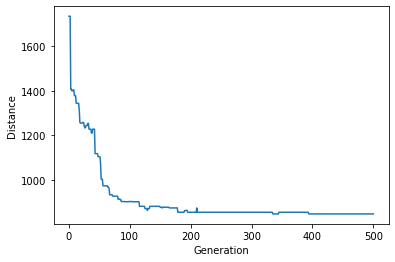

In [35]:
geneticAlgorithmPlot(population=cityList, popSize=100, eliteSize=20, mutationRate=0.01, generations=500)



In [ ]:
def create_population(size, bounds):
    population = []
    for _ in range(size):
        individual = [random.uniform(bounds[0], bounds[1]), random.uniform(bounds[0], bounds[1])]
        population.append(individual)
    return population

def fitness_function(individual, f):
    x, y = individual
    return f(x, y)

def selection(population, num_parents):
    parents = []
    for _ in range(num_parents):
        selected = random.choice(population)
        parents.append(selected)
    return parents

def crossover(parents, num_offspring):
    offspring = []
    for _ in range(num_offspring):
        parent1, parent2 = random.sample(parents, 2)
        child = [parent1[0], parent2[1]]  
        offspring.append(child)
    return offspring

def mutation(offspring, mutation_rate, bounds):
    for child in offspring:
        if random.random() < mutation_rate:
            child[0] = random.uniform(bounds[0], bounds[1])  
            child[1] = random.uniform(bounds[0], bounds[1])  

def genetic_algorithm(bounds, population_size, num_generations, num_parents, num_offspring, mutation_rate, f):
    population = create_population(population_size, bounds)

    for _ in range(num_generations):
        parents = selection(population, num_parents)
        offspring = crossover(parents, num_offspring)
        mutation(offspring, mutation_rate, bounds)

        population = parents + offspring

        fitness_values = [fitness_function(individual, f) for individual in population]

        best_fitness = min(fitness_values)
        best_individual = population[fitness_values.index(best_fitness)]

    return best_individual, population

bounds = (-1.0, 1.0)
population_size = 100
num_generations = 50
num_parents = 50
num_offspring = 50
mutation_rate = 0.1